## DS-6014 Bayesian Approach to Predicting a Song's Decade
Rachel Filderman, Emily Lien, and Emily Murphy

### Load Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pymc3 as pm
import arviz as az
import scipy.linalg as la
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('spotify_decades.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature,decade
0,0.437,0.940,9,-6.946,1,0.0426,0.0524,0.000573,0.2220,0.480,151.417,audio_features,4NnWuGQujzWUEg0uZokO5M,212013,4,80s
1,0.692,0.422,2,-10.533,1,0.0333,0.0811,0.000000,0.0848,0.468,74.375,audio_features,2DjWsDGgL1xNbhnr7f6t5F,193120,4,80s
2,0.565,0.764,1,-9.430,1,0.0351,0.0139,0.004880,0.0790,0.686,100.891,audio_features,7gozgbG5EBTukCFWToTRA5,277480,4,80s
3,0.851,0.406,1,-11.631,1,0.0661,0.2190,0.000006,0.0853,0.792,97.840,audio_features,4kOfxxnW1ukZdsNbCKY9br,226880,4,80s
4,0.768,0.829,5,-5.109,1,0.0313,0.0964,0.000029,0.0970,0.962,118.773,audio_features,2olVm1lHicpveMAo4AUDRB,234333,4,80s


In [3]:
df['decade'] = df['decade'].astype('category')
df_only = df.query("(decade=='60s'| decade=='80s' | decade=='00s')")

### Density Distribution Plots

In [4]:
df['decade'] = df.decade.map({'50s': 1950, '60s': 1960,'70s': 1970, '80s': 1980,'90s': 1990, '00s': 2000,'10s': 2010})

/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

Text(0.5, 1.0, 'Distribution of Danceability, by Decade')

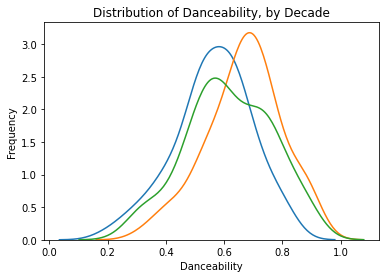

In [5]:
sns.distplot(df.query("decade==1960").danceability,hist=False,label='1960s')
sns.distplot(df.query("decade==1980").danceability,hist=False,label='1980s')
sns.distplot(df.query("decade==2000").danceability,hist=False,label='2000s')
plt.ylabel('Frequency')
plt.xlabel('Danceability')
plt.title('Distribution of Danceability, by Decade')

/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

Text(0.5, 1.0, 'Distribution of Energy, by Decade')

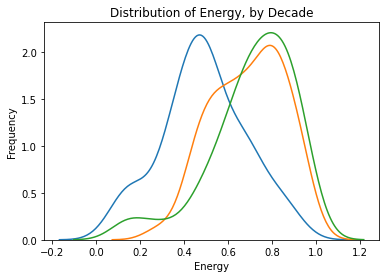

In [6]:
sns.distplot(df.query("decade==1960").energy,hist=False,label='1960s')
sns.distplot(df.query("decade==1980").energy,hist=False,label='1980s')
sns.distplot(df.query("decade==2000").energy,hist=False,label='2000s')
plt.ylabel('Frequency')
plt.xlabel('Energy')
plt.title('Distribution of Energy, by Decade')

/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

Text(0.5, 1.0, 'Distribution of Loudness, by Decade')

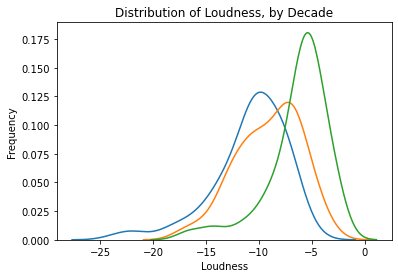

In [7]:
sns.distplot(df.query("decade==1960").loudness,hist=False,label='1960s')
sns.distplot(df.query("decade==1980").loudness,hist=False,label='1980s')
sns.distplot(df.query("decade==2000").loudness,hist=False,label='2000s')
plt.ylabel('Frequency')
plt.xlabel('Loudness')
plt.title('Distribution of Loudness, by Decade')

/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

Text(0.5, 1.0, 'Distribution of Speechiness, by Decade')

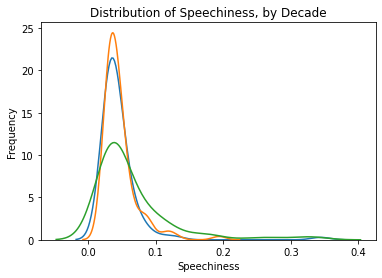

In [8]:
sns.distplot(df.query("decade==1960").speechiness,hist=False,label='1960s')
sns.distplot(df.query("decade==1980").speechiness,hist=False,label='1980s')
sns.distplot(df.query("decade==2000").speechiness,hist=False,label='2000s')
plt.ylabel('Frequency')
plt.xlabel('Speechiness')
plt.title('Distribution of Speechiness, by Decade')

/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

Text(0.5, 1.0, 'Distribution of Acousticness, by Decade')

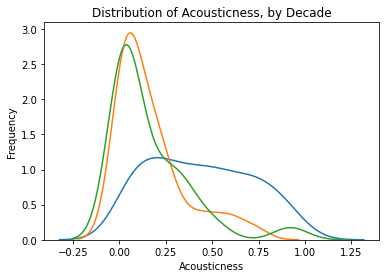

In [9]:
sns.distplot(df.query("decade==1960").acousticness,hist=False,label='1960s')
sns.distplot(df.query("decade==1980").acousticness,hist=False,label='1980s')
sns.distplot(df.query("decade==2000").acousticness,hist=False,label='2000s')
plt.ylabel('Frequency')
plt.xlabel('Acousticness')
plt.title('Distribution of Acousticness, by Decade')

/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

Text(0.5, 1.0, 'Distribution of Instrumentalness, by Decade')

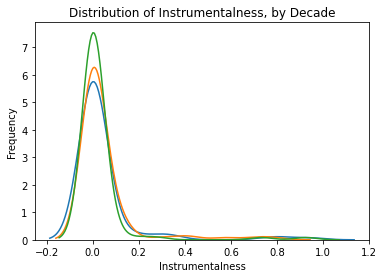

In [10]:
sns.distplot(df.query("decade==1960").instrumentalness,hist=False,label='1960s')
sns.distplot(df.query("decade==1980").instrumentalness,hist=False,label='1980s')
sns.distplot(df.query("decade==2000").instrumentalness,hist=False,label='2000s')
plt.ylabel('Frequency')
plt.xlabel('Instrumentalness')
plt.title('Distribution of Instrumentalness, by Decade')

/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

Text(0.5, 1.0, 'Distribution of Liveness, by Decade')

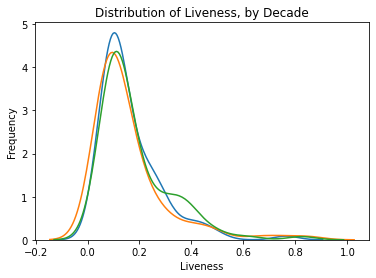

In [11]:
sns.distplot(df.query("decade==1960").liveness,hist=False,label='1960s')
sns.distplot(df.query("decade==1980").liveness,hist=False,label='1980s')
sns.distplot(df.query("decade==2000").liveness,hist=False,label='2000s')
plt.ylabel('Frequency')
plt.xlabel('Liveness')
plt.title('Distribution of Liveness, by Decade')

/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

Text(0.5, 1.0, 'Distribution of Valence, by Decade')

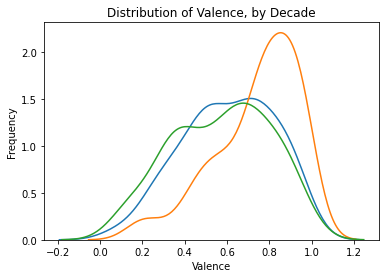

In [12]:
sns.distplot(df.query("decade==1960").valence,hist=False,label='1960s')
sns.distplot(df.query("decade==1980").valence,hist=False,label='1980s')
sns.distplot(df.query("decade==2000").valence,hist=False,label='2000s')
plt.ylabel('Frequency')
plt.xlabel('Valence')
plt.title('Distribution of Valence, by Decade')

/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

Text(0.5, 1.0, 'Distribution of Tempo, by Decade')

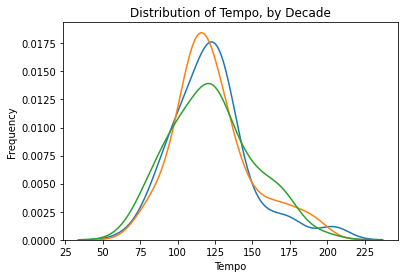

In [13]:
sns.distplot(df.query("decade==1960").tempo,hist=False,label='1960s')
sns.distplot(df.query("decade==1980").tempo,hist=False,label='1980s')
sns.distplot(df.query("decade==2000").tempo,hist=False,label='2000s')
plt.ylabel('Frequency')
plt.xlabel('Tempo')
plt.title('Distribution of Tempo, by Decade')

/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/rachelfilderman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

Text(0.5, 1.0, 'Distribution of Duration, by Decade')

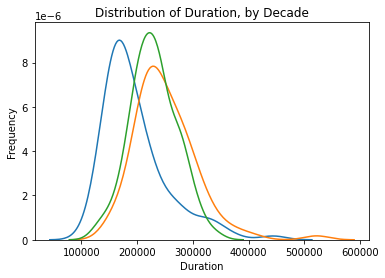

In [14]:
sns.distplot(df.query("decade==1960").duration_ms,hist=False,label='1960s')
sns.distplot(df.query("decade==1980").duration_ms,hist=False,label='1980s')
sns.distplot(df.query("decade==2000").duration_ms,hist=False,label='2000s')
plt.ylabel('Frequency')
plt.xlabel('Duration')
plt.title('Distribution of Duration, by Decade')

### Data Preparation

In [15]:
# Numeric predictors
numeric_predictors = ["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]
x_num = df_only[numeric_predictors]
mean = x_num.mean()
std = x_num.std()
x_num = np.array((x_num - mean) / std)

In [16]:
k = len(numeric_predictors)
X = x_num
y = pd.get_dummies(df_only['decade'])
y = y[['60s','80s','00s']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X = X_train
y = y_train

### 60s Model

In [19]:
# Build the model with priors and run the sampling
with pm.Model() as sixties_model:
    # Intercept term & prior
    β0 = pm.Normal('β0', mu=0, sd=1)
    # Beta coefficients for predictor variables & priors
    β = pm.MvNormal('β', mu=np.zeros(k), cov=np.eye(k), shape=k)
    
    # Calculate the logit 
    μ = β0 + pm.math.dot(X,β)
    θ = pm.Deterministic('θ',  pm.invlogit(μ))
    # Pass the logits to a Bernoulli outcome, with the observed data
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=y['60s']) 
    
    # Sample
    trace_main = pm.sample(10000, cores = 8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [β, β0]


Sampling 8 chains for 1_000 tune and 10_000 draw iterations (8_000 + 80_000 draws total) took 64 seconds.


In [20]:
with sixties_model:
    main_idata = az.from_pymc3(trace_main)
df2 = az.summary(main_idata, var_names=['β0','β'], round_to=2)

In [21]:
df2 = df2.rename(index={'β0': "intercept", 'β[0]': numeric_predictors[0], 'β[1]': numeric_predictors[1], 'β[2]': numeric_predictors[2], 'β[3]':numeric_predictors[3], 'β[4]': numeric_predictors[4], 'β[5]': numeric_predictors[5], 'β[6]': numeric_predictors[6], 'β[7]': numeric_predictors[7], 'β[8]': numeric_predictors[8], 'β[9]': numeric_predictors[9]})
df2

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,-1.11,0.22,-1.52,-0.71,0.0,0.0,111167.21,105334.48,111560.02,65501.34,1.0
danceability,-0.51,0.25,-0.98,-0.03,0.0,0.0,90582.91,84298.03,90562.10,66563.51,1.0
energy,-0.53,0.33,-1.14,0.09,0.0,0.0,88273.40,74176.41,88334.90,65773.46,1.0
loudness,-0.60,0.31,-1.18,-0.03,0.0,0.0,98197.08,86435.31,98272.72,68574.44,1.0
speechiness,-0.01,0.22,-0.43,0.41,0.0,0.0,111103.49,40140.91,113667.54,61336.66,1.0
acousticness,0.79,0.24,0.34,1.25,0.0,0.0,116449.47,106813.96,116545.09,64323.92,1.0
instrumentalness,-0.03,0.19,-0.39,0.32,0.0,0.0,114096.36,38573.48,114374.12,60055.78,1.0
liveness,0.19,0.22,-0.23,0.61,0.0,0.0,117145.52,66329.74,117296.52,63591.29,1.0
valence,0.25,0.25,-0.22,0.73,0.0,0.0,93777.42,70729.22,93793.64,67861.20,1.0
tempo,0.18,0.21,-0.21,0.59,0.0,0.0,103668.61,68664.26,103760.19,66912.03,1.0


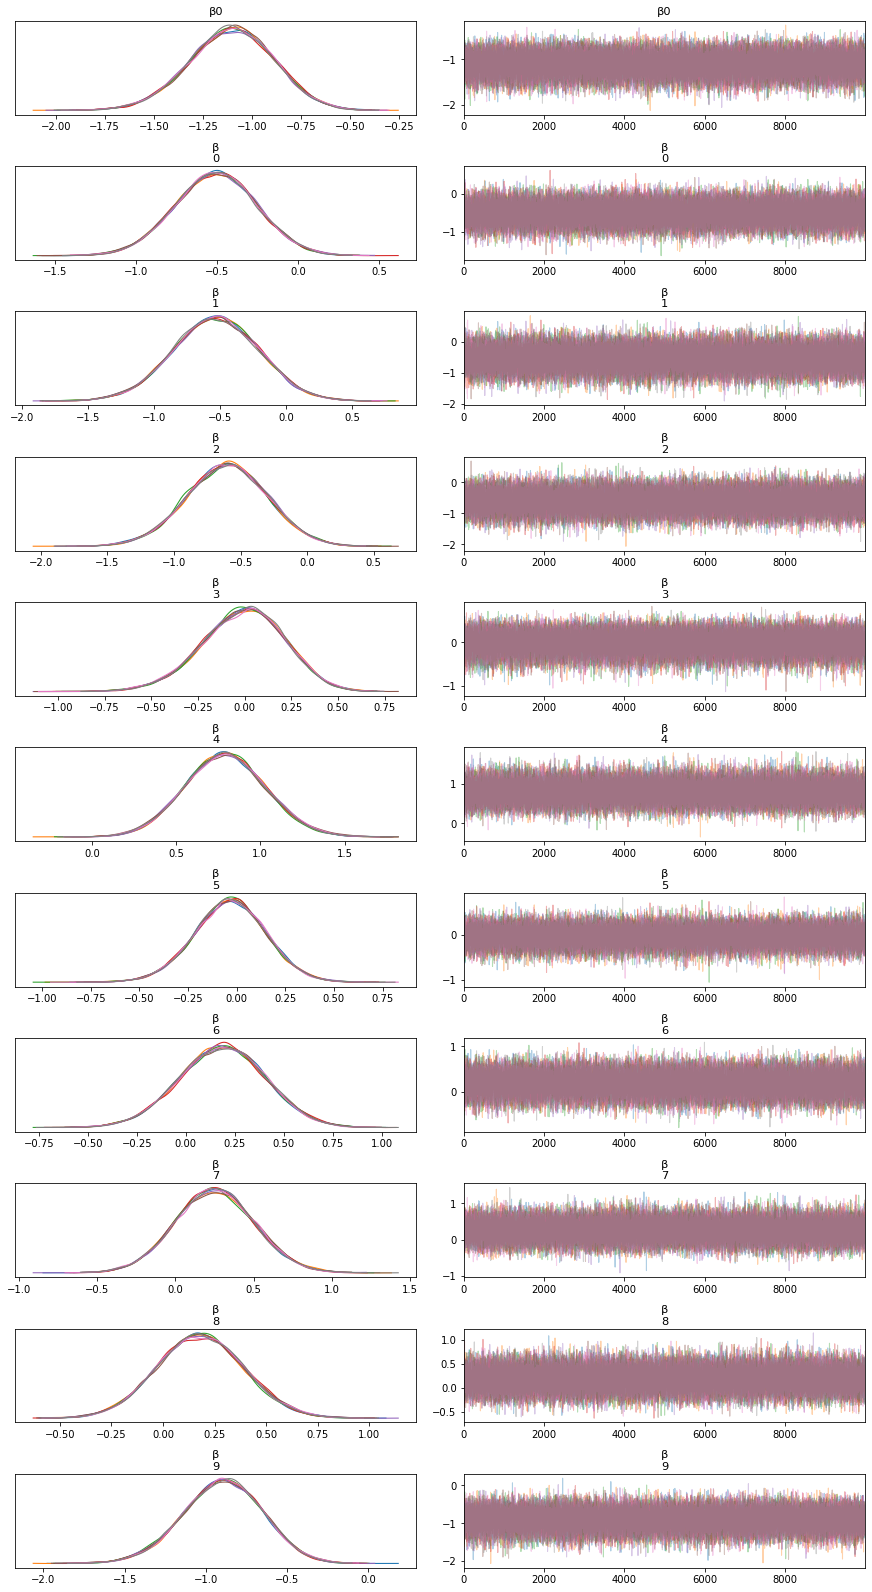

In [22]:
# Trace plots
with sixties_model:
    az.plot_trace(trace_main, var_names=['β0','β'])

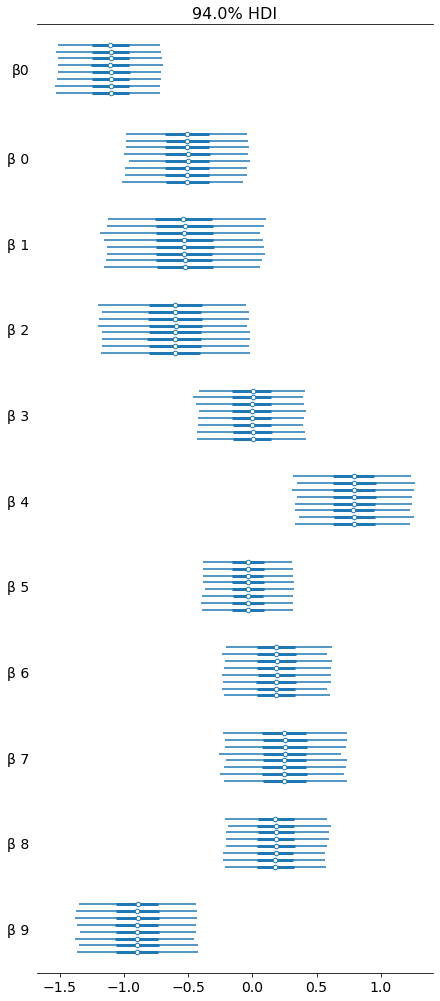

In [23]:
with sixties_model:
    pm.forestplot(trace_main, var_names=['β0','β'])

### 80s Model

In [24]:
# Build the model with priors and run the sampling
with pm.Model() as eighties_model:
    
    # Intercept term & prior
    β0 = pm.Normal('β0', mu=0, sd=1)
    # Beta coefficients for predictor variables & priors
    β = pm.MvNormal('β', mu=np.zeros(k), cov=np.eye(k), shape=k)
    
    # Calculate the logit 
    μ = β0 + pm.math.dot(X,β)
    θ = pm.Deterministic('θ',  pm.invlogit(μ))
    # Pass the logits to a Bernoulli outcome, with the observed data
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=y['80s']) 
    
    # Sample
    trace_main = pm.sample(10000, cores = 8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [β, β0]


Sampling 8 chains for 1_000 tune and 10_000 draw iterations (8_000 + 80_000 draws total) took 70 seconds.


In [25]:
with eighties_model:
    main_idata = az.from_pymc3(trace_main)
df3 = az.summary(main_idata, var_names=['β0','β'], round_to=2)

In [26]:
df3 = df3.rename(index={'β0': "intercept", 'β[0]': numeric_predictors[0], 'β[1]': numeric_predictors[1], 'β[2]': numeric_predictors[2], 'β[3]':numeric_predictors[3], 'β[4]': numeric_predictors[4], 'β[5]': numeric_predictors[5], 'β[6]': numeric_predictors[6], 'β[7]': numeric_predictors[7], 'β[8]': numeric_predictors[8], 'β[9]': numeric_predictors[9]})
df3

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,-1.14,0.21,-1.52,-0.74,0.0,0.0,103789.88,100269.55,103978.84,64074.28,1.0
danceability,0.54,0.25,0.07,1.02,0.0,0.0,88369.10,80881.74,88539.85,67749.67,1.0
energy,1.14,0.34,0.50,1.79,0.0,0.0,83998.05,79760.11,84104.57,62043.89,1.0
loudness,-1.32,0.32,-1.91,-0.72,0.0,0.0,89063.53,85703.69,89251.51,64720.67,1.0
speechiness,-0.56,0.28,-1.09,-0.07,0.0,0.0,102920.41,75161.01,110828.55,59060.77,1.0
acousticness,-0.58,0.26,-1.07,-0.09,0.0,0.0,118907.52,95707.65,119471.83,64990.62,1.0
instrumentalness,0.11,0.18,-0.23,0.44,0.0,0.0,125069.88,53184.57,126208.15,59480.33,1.0
liveness,-0.24,0.19,-0.60,0.11,0.0,0.0,126294.06,72212.59,127071.49,59040.44,1.0
valence,0.58,0.24,0.13,1.03,0.0,0.0,96391.49,86709.31,96634.60,66343.64,1.0
tempo,-0.07,0.22,-0.48,0.34,0.0,0.0,111192.17,46277.68,111249.05,64623.00,1.0


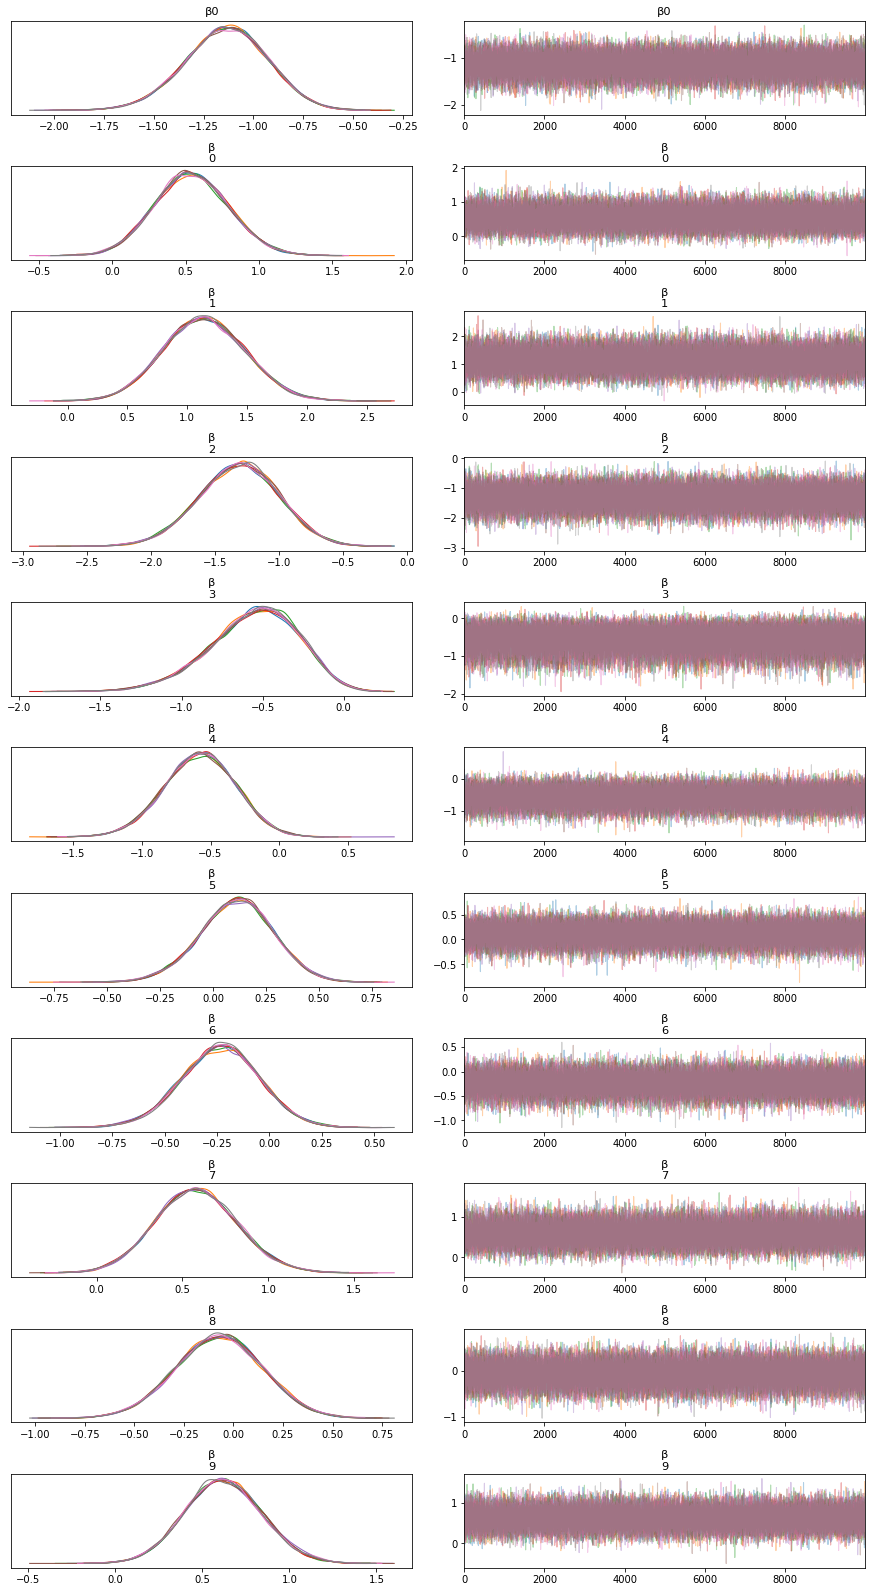

In [27]:
# Trace plots
with eighties_model:
    az.plot_trace(trace_main, var_names=['β0','β'])

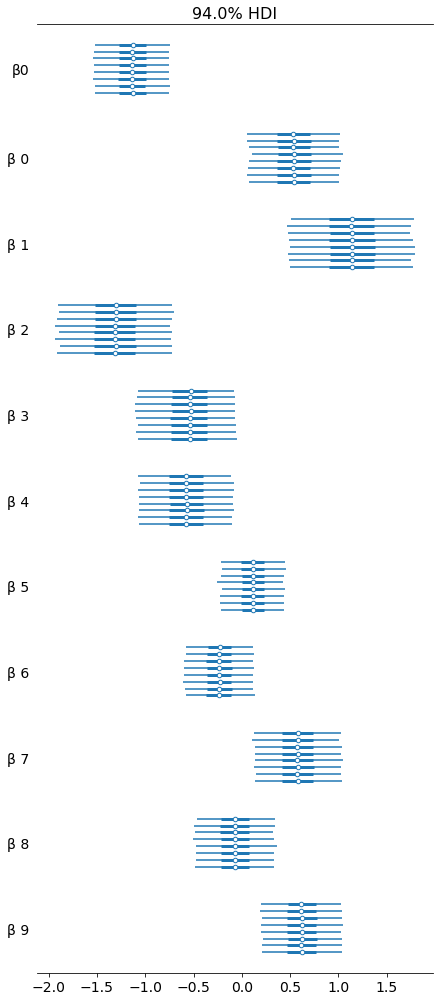

In [28]:
with eighties_model:
    pm.forestplot(trace_main, var_names=['β0','β'])

### 2000s Model

In [29]:
# Build the model with priors and run the sampling
with pm.Model() as millenium_model:
    
    # Intercept term & prior
    β0 = pm.Normal('β0', mu=0, sd=1)
    # Beta coefficients for predictor variables & priors
    β = pm.MvNormal('β', mu=np.zeros(k), cov=np.eye(k), shape=k)
    
    # Calculate the logit 
    μ = β0 + pm.math.dot(X,β)
    θ = pm.Deterministic('θ',  pm.invlogit(μ))
    # Pass the logits to a Bernoulli outcome, with the observed data
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=y['00s']) 
    
    # Sample
    trace_main = pm.sample(10000, cores = 8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [β, β0]


Sampling 8 chains for 1_000 tune and 10_000 draw iterations (8_000 + 80_000 draws total) took 70 seconds.


In [30]:
with millenium_model:
    main_idata = az.from_pymc3(trace_main)
df4 = az.summary(main_idata, var_names=['β0','β'], round_to=2)

In [31]:
df4 = df4.rename(index={'β0': "intercept", 'β[0]': numeric_predictors[0], 'β[1]': numeric_predictors[1], 'β[2]': numeric_predictors[2], 'β[3]':numeric_predictors[3], 'β[4]': numeric_predictors[4], 'β[5]': numeric_predictors[5], 'β[6]': numeric_predictors[6], 'β[7]': numeric_predictors[7], 'β[8]': numeric_predictors[8], 'β[9]': numeric_predictors[9]})
df4

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,-1.04,0.21,-1.43,-0.64,0.0,0.0,105027.72,100918.98,105173.04,63373.83,1.0
danceability,0.02,0.24,-0.43,0.47,0.0,0.0,93729.91,52870.16,93709.48,68580.85,1.0
energy,-0.58,0.32,-1.17,0.04,0.0,0.0,83710.20,75225.72,83701.66,63930.52,1.0
loudness,2.05,0.37,1.35,2.74,0.0,0.0,86678.21,84179.58,86965.38,63866.35,1.0
speechiness,0.33,0.20,-0.05,0.70,0.0,0.0,119764.08,77281.43,123999.11,59197.45,1.0
acousticness,-0.39,0.27,-0.88,0.12,0.0,0.0,116016.06,85294.14,115931.38,61870.72,1.0
instrumentalness,-0.16,0.25,-0.64,0.28,0.0,0.0,100580.12,45814.34,110958.79,55206.22,1.0
liveness,0.01,0.18,-0.34,0.36,0.0,0.0,131979.70,34959.33,132224.81,60311.94,1.0
valence,-0.88,0.24,-1.34,-0.43,0.0,0.0,101195.59,95478.90,101346.96,67511.14,1.0
tempo,-0.13,0.22,-0.54,0.28,0.0,0.0,117687.37,58321.51,117802.68,66640.05,1.0


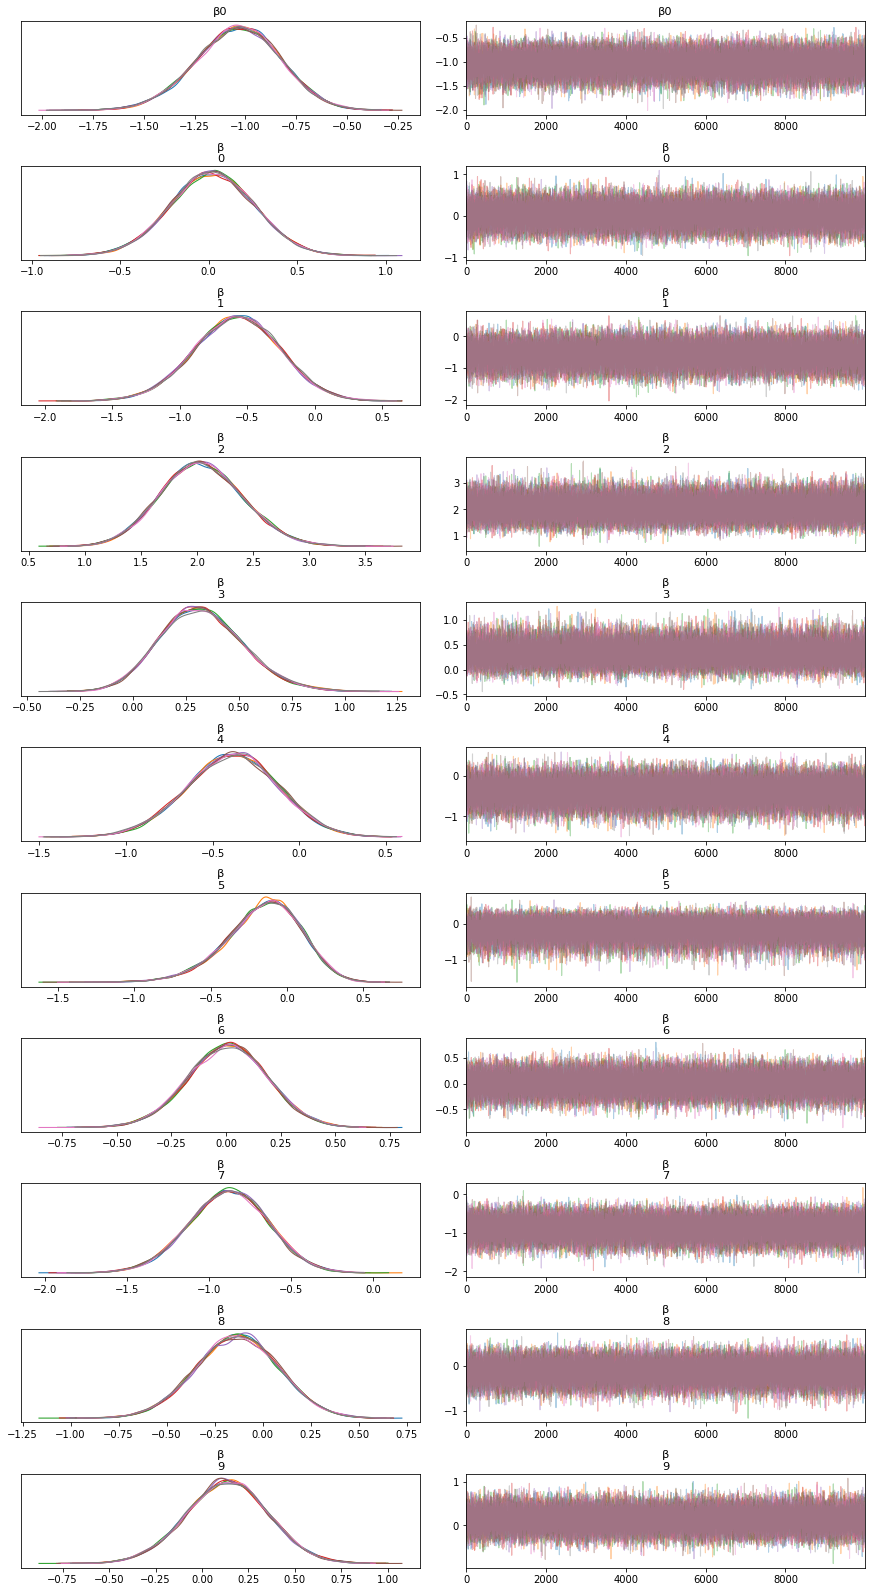

In [32]:
# Trace plots
with millenium_model:
    az.plot_trace(trace_main, var_names=['β0','β'])

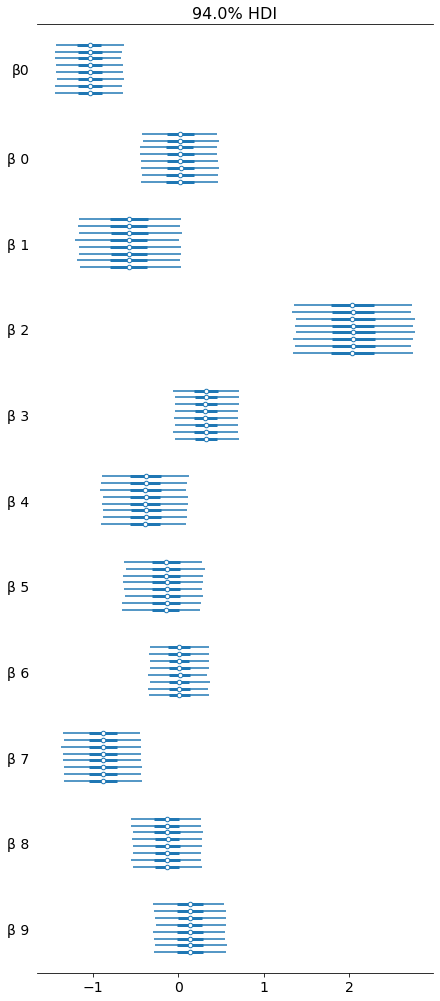

In [33]:
with millenium_model:
    pm.forestplot(trace_main, var_names=['β0','β'])

### Graphical Model 

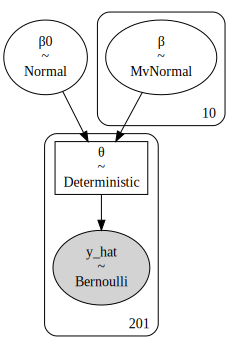

In [34]:
pm.model_to_graphviz(sixties_model)

### Compare and Combine Predictor Summaries

In [35]:
df2

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,-1.11,0.22,-1.52,-0.71,0.0,0.0,111167.21,105334.48,111560.02,65501.34,1.0
danceability,-0.51,0.25,-0.98,-0.03,0.0,0.0,90582.91,84298.03,90562.10,66563.51,1.0
energy,-0.53,0.33,-1.14,0.09,0.0,0.0,88273.40,74176.41,88334.90,65773.46,1.0
loudness,-0.60,0.31,-1.18,-0.03,0.0,0.0,98197.08,86435.31,98272.72,68574.44,1.0
speechiness,-0.01,0.22,-0.43,0.41,0.0,0.0,111103.49,40140.91,113667.54,61336.66,1.0
acousticness,0.79,0.24,0.34,1.25,0.0,0.0,116449.47,106813.96,116545.09,64323.92,1.0
instrumentalness,-0.03,0.19,-0.39,0.32,0.0,0.0,114096.36,38573.48,114374.12,60055.78,1.0
liveness,0.19,0.22,-0.23,0.61,0.0,0.0,117145.52,66329.74,117296.52,63591.29,1.0
valence,0.25,0.25,-0.22,0.73,0.0,0.0,93777.42,70729.22,93793.64,67861.20,1.0
tempo,0.18,0.21,-0.21,0.59,0.0,0.0,103668.61,68664.26,103760.19,66912.03,1.0


In [36]:
df3

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,-1.14,0.21,-1.52,-0.74,0.0,0.0,103789.88,100269.55,103978.84,64074.28,1.0
danceability,0.54,0.25,0.07,1.02,0.0,0.0,88369.10,80881.74,88539.85,67749.67,1.0
energy,1.14,0.34,0.50,1.79,0.0,0.0,83998.05,79760.11,84104.57,62043.89,1.0
loudness,-1.32,0.32,-1.91,-0.72,0.0,0.0,89063.53,85703.69,89251.51,64720.67,1.0
speechiness,-0.56,0.28,-1.09,-0.07,0.0,0.0,102920.41,75161.01,110828.55,59060.77,1.0
acousticness,-0.58,0.26,-1.07,-0.09,0.0,0.0,118907.52,95707.65,119471.83,64990.62,1.0
instrumentalness,0.11,0.18,-0.23,0.44,0.0,0.0,125069.88,53184.57,126208.15,59480.33,1.0
liveness,-0.24,0.19,-0.60,0.11,0.0,0.0,126294.06,72212.59,127071.49,59040.44,1.0
valence,0.58,0.24,0.13,1.03,0.0,0.0,96391.49,86709.31,96634.60,66343.64,1.0
tempo,-0.07,0.22,-0.48,0.34,0.0,0.0,111192.17,46277.68,111249.05,64623.00,1.0


In [37]:
df4

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,-1.04,0.21,-1.43,-0.64,0.0,0.0,105027.72,100918.98,105173.04,63373.83,1.0
danceability,0.02,0.24,-0.43,0.47,0.0,0.0,93729.91,52870.16,93709.48,68580.85,1.0
energy,-0.58,0.32,-1.17,0.04,0.0,0.0,83710.20,75225.72,83701.66,63930.52,1.0
loudness,2.05,0.37,1.35,2.74,0.0,0.0,86678.21,84179.58,86965.38,63866.35,1.0
speechiness,0.33,0.20,-0.05,0.70,0.0,0.0,119764.08,77281.43,123999.11,59197.45,1.0
acousticness,-0.39,0.27,-0.88,0.12,0.0,0.0,116016.06,85294.14,115931.38,61870.72,1.0
instrumentalness,-0.16,0.25,-0.64,0.28,0.0,0.0,100580.12,45814.34,110958.79,55206.22,1.0
liveness,0.01,0.18,-0.34,0.36,0.0,0.0,131979.70,34959.33,132224.81,60311.94,1.0
valence,-0.88,0.24,-1.34,-0.43,0.0,0.0,101195.59,95478.90,101346.96,67511.14,1.0
tempo,-0.13,0.22,-0.54,0.28,0.0,0.0,117687.37,58321.51,117802.68,66640.05,1.0


In [38]:
mean1 = df2['mean']
mean2 = df3['mean']
mean3 = df4['mean']

In [39]:
means = pd.concat([mean1, mean2, mean3], axis=1, sort=False)

In [40]:
means.columns = ['60s', '80s', '00s'] 
means

,60s,80s,00s
intercept,-1.11,-1.14,-1.04
danceability,-0.51,0.54,0.02
energy,-0.53,1.14,-0.58
loudness,-0.60,-1.32,2.05
speechiness,-0.01,-0.56,0.33
acousticness,0.79,-0.58,-0.39
instrumentalness,-0.03,0.11,-0.16
liveness,0.19,-0.24,0.01
valence,0.25,0.58,-0.88
tempo,0.18,-0.07,-0.13


### Predict Decades for Test Data

In [41]:
intercept = np.ones((99,1))
x_values = np.append(intercept, X_test, 1)
x_values[1,:]

array([ 1.        , -0.45519421,  1.16665727,  1.27851688, -0.47489115,
       -0.97930164, -0.28780283,  0.27959538, -1.41418078, -0.05015572,
        0.25296713])

In [42]:
predictions = np.zeros((99,3))

In [43]:
for i in range(len(x_values)):
    new_values = x_values[i,:]
    prob_six = sum(means.iloc[:,0]*new_values)
    predictions[i,0] += np.exp(prob_six)/(1+np.exp(prob_six))
    prob_eight = sum(means.iloc[:,1]*new_values)
    predictions[i,1] += np.exp(prob_eight)/(1+np.exp(prob_eight))
    prob_thous = sum(means.iloc[:,2]*new_values)
    predictions[i,2] += np.exp(prob_thous)/(1+np.exp(prob_thous))

In [44]:
pred = pd.DataFrame(predictions)
pred['Max'] = pred.idxmax(axis=1)
pred['Max'] = pred['Max'].map({0: '60s', 1: '80s',2: '00s'})

In [45]:
y_test.head()

,60s,80s,00s
502,0,0,1
565,0,0,1
352,1,0,0
9,0,1,0
532,0,0,1


In [46]:
Y_test = y_test.idxmax(axis=1)

In [47]:
conf_matrix = confusion_matrix(Y_test, pred['Max'],labels=['60s','80s','00s'])
conf_matrix

array([[23,  4,  5],
       [ 5, 28,  5],
       [ 4,  4, 21]])

In [48]:
accuracy = round((23+28+21)/99*100,2)
accuracy

72.73

In [49]:
recall=np.zeros((3,1))
for i in range(3):
    recall[i]+=conf_matrix[i,i]/conf_matrix[i,:].sum()
    
recall

array([[0.71875   ],
       [0.73684211],
       [0.72413793]])

In [50]:
precision=np.zeros((3,1))
for i in range(3):
    precision[i]+=conf_matrix[i,i]/conf_matrix[:,i].sum()
    
precision

array([[0.71875   ],
       [0.77777778],
       [0.67741935]])